# Proyek Analisis Data: [BIke-sharing-dataset]
- **Nama:** [Annisa Auliya Ramadhani]
- **Email:** [annisaauliyar22003@gmail.com]
- **ID Dicoding:** [annisaauliyaramadhan]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda disepanjang bulan selama satu tahun terakhir?
- Apakah terdapat perbedaan pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual pada hari kerja dibandingkan dengan akhir pekan?
- Apa pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada hari kerja dan akhir pekan?
- Seberapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual terhadap total penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Data Wrangling


### Gathering Data

**day_df**

In [3]:
day_df=pd.read_csv("https://raw.githubusercontent.com/Ann1s4/Data-Analysis-Project-Dicoding/main/Bike-Sharing-Dataset/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**hour_df**

In [4]:
hour_df=pd.read_csv("https://raw.githubusercontent.com/Ann1s4/Data-Analysis-Project-Dicoding/main/Bike-Sharing-Dataset/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca data yang akan digunakaan dalam proses analysis, data yang digunakan ada 2 yaitu, day dan hour.
- Data tersebut disimpan dalam github dan dapat diakses melalui link.
- Selanjutnya, proses assessing data yakni mengindetifikasi masalah yang terdapat dalam data seperti outlier,missing value,duplicate.                                                                                                                 

### Assessing Data

**Penilaian terhadap day_df**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Penilaian terhadap hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Setelah proses assessing data, dapat diketahui masalah yang ada dalam data
- Dataset day_df terdiri dari 731 entri dan memiliki tipe data yang sesuai di setiap kolom, tanpa missing values maupun nilai yang duplikat.
- Dataset hour_df dari 17379 entri sudah memiliki tipe data yang sesuai di setiap kolom, tanpa missing values maupun nilai yang duplikat yang menjamin keunikan setiap entri.

### Cleaning Data

**Membersihkan tabel day_df**

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Menghapus kolom yang tidak dibutuhkan**

In [12]:
day_df = day_df.drop(columns=['instant', 'dteday', 'season', 'yr', 'holiday'])
day_df.head()

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Menghapus nilai duplikat**

In [13]:
day_df = day_df.drop_duplicates()
print(day_df.duplicated().sum())

0


**Missing value**

In [14]:
missing_values = day_df.isnull().sum()
print(missing_values)

mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Membersihkan tabel hour_df**

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Menghapus kolom yang tidak dibutuhkan**

In [16]:
hour_df = hour_df.drop(columns=['instant', 'dteday', 'season', 'hr'])
hour_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Menghapus nilai duplikat**

In [17]:
hour_df = day_df.drop_duplicates()
print(hour_df.duplicated().sum())

0


**Missing values**

In [18]:
missing_values = hour_df.isnull().sum()
print(missing_values)

mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Pada tahap cleaning masalah yang terdapat di assesing data akan diatasi dengan cara menghapus kolom, menghapus nilai duplikat, dan mengatasi missing value
- Tahap cleaning terdiri atas 3 tahap yakni: Define,Code dan test.

## Exploratory Data Analysis (EDA)

Melakukan eksplorasi data

In [19]:
hour_df.head()

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
day_df.head(5)

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
final_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="mnth",
    right_on="mnth"
)
final_df.head()



,mnth,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
day_df.describe(include="all")

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,3.451913,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,7.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,10.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,12.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tren penggunaan sepeda sepajang bulan

In [34]:
# Mengubah nilai kolom 'mnth' ke dalam format nama bulan
final_df['month_name'] = final_df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [60]:
# Menghitung total penggunaan sepeda tiap bulan
monthly_usage = day_df.groupby('month_name')['cnt'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'])

In [62]:
# Membuat pivot table untuk total penggunaan sepeda per bulan
pivot_table = pd.pivot_table(day_df, values='cnt', index='month_name', aggfunc='sum')

# Menampilkan pivot table
print(pivot_table)

               cnt
month_name        
April       269094
August      351194
December    211036
February    151352
January     134933
July        344948
June        346342
March       228920
May         331686
November    254831
October     322352
September   345991


Pola penggunaan Sepeda

In [63]:
# Mengubah kolom 'workingday' menjadi deskripsi
# 0 -> Akhir Pekan & Hari Libur, 1 -> Hari Kerja
day_df['workingday_desc'] = day_df['workingday'].map({
    0: 'Akhir Pekan & Hari Libur',
    1: 'Hari Kerja'
})

In [65]:
# Membuat pivot table untuk melihat total penggunaan sepeda oleh pengguna kasual dan terdaftar berdasarkan hari kerja dan akhir pekan
pivot_workingday = day_df.pivot_table(
    values=['casual', 'registered'],
    index='workingday_desc',
    aggfunc='sum'
)

# Menampilkan pivot table
print(pivot_workingday)

                          casual  registered
workingday_desc                             
Akhir Pekan & Hari Libur  316732      683537
Hari Kerja                303285     1989125


Pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda

In [66]:
# Menambahkan kolom deskripsi untuk 'workingday'
# 0 -> Akhir Pekan & Hari Libur, 1 -> Hari Kerja
day_df['workingday_desc'] = day_df['workingday'].map({
    0: 'Akhir Pekan & Hari Libur',
    1: 'Hari Kerja'
})

In [67]:
# Menambahkan deskripsi pada kolom 'weathersit'
day_df['weather_desc'] = day_df['weathersit'].map({
    1: 'Cerah/Cerah Sebagian',
    2: 'Berkabut/Mendung',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan Lebat/Badai'
})

In [68]:
# Membuat pivot table untuk melihat jumlah penggunaan sepeda berdasarkan hari kerja dan kondisi cuaca
pivot_weather = day_df.pivot_table(
    values='cnt',
    index='weather_desc',
    columns='workingday_desc',
    aggfunc='sum'
)

# Menampilkan pivot table
print("Pivot Table Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda")
print(pivot_weather)

Pivot Table Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda
workingday_desc       Akhir Pekan & Hari Libur  Hari Kerja
weather_desc                                              
Berkabut/Mendung                        275578      721280
Cerah/Cerah Sebagian                    715614     1542338
Hujan/Salju Ringan                        9077       28792


Seberapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual terhadap total penggunaan sepeda

In [69]:
# Menghitung total penggunaan sepeda oleh pengguna terdaftar dan kasual
total_registered = hour_df['registered'].sum()
total_casual = hour_df['casual'].sum()
total_usage = total_registered + total_casual

In [70]:
# Menghitung kontribusi
contribution_registered = (total_registered / total_usage) * 100
contribution_casual = (total_casual / total_usage) * 100

In [71]:
# Menampilkan hasil kontribusi
print(f"Total Pengguna Terdaftar: {total_registered}")
print(f"Total Pengguna Kasual: {total_casual}")
print(f"Kontribusi Pengguna Terdaftar: {contribution_registered:.2f}%")
print(f"Kontribusi Pengguna Kasual: {contribution_casual:.2f}%")

Total Pengguna Terdaftar: 2672662
Total Pengguna Kasual: 620017
Kontribusi Pengguna Terdaftar: 81.17%
Kontribusi Pengguna Kasual: 18.83%


**Insight:**
- Tren penggunaan sepeda disepanjang bulan selama satu tahun terakhir: Dapat dianalisis dengan mengelompokkan data berdasarkan nama bulan dan menghitung total penggunaan sepeda
- Perbedaan pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual pada hari kerja dibandingkan dengan akhir pekan: dapat dianalisis dengan melihat total penggunaan sepeda untuk masing-masing kategori berdasarkan hari kerja dan akhir pekan.
- Pengaruh kondisi cuaca berdasarkan hari kerja dan kondisi cuaca: dapat dinalisis dengan menggabungkan data kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) dengan total penggunaan sepeda pada hari kerja dan akhir pekan.
- Seberapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual terhadap total penggunaan sepeda: dapat dianalisis dengan menghitung total penggunaan sepeda oleh masing-masing kategori pengguna (terdaftar dan kasual) dan kemudian menghitung kontribusi persentase masing-masing terhadap total penggunaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda disepanjang bulan selama satu tahun terakhir?

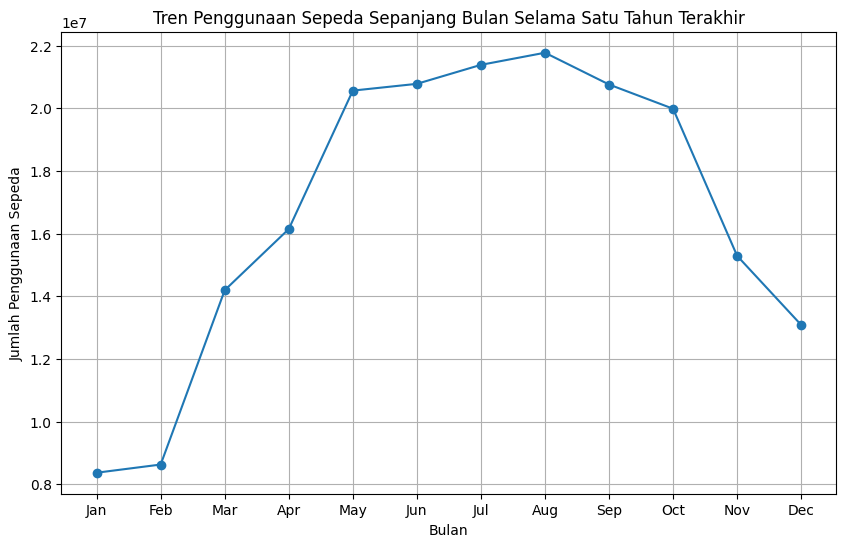

In [55]:
# Menghitung jumlah total penggunaan sepeda per bulan
monthly_usage = final_df.groupby('mnth')['cnt_x'].sum()

# Membuat plot untuk menampilkan tren penggunaan sepeda sepanjang bulan
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='line', marker='o')
plt.title('Tren Penggunaan Sepeda Sepanjang Bulan Selama Satu Tahun Terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.xticks(monthly_usage.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Pertanyaan 2: Apakah terdapat perbedaan pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual pada hari kerja dibandingkan dengan akhir pekan?

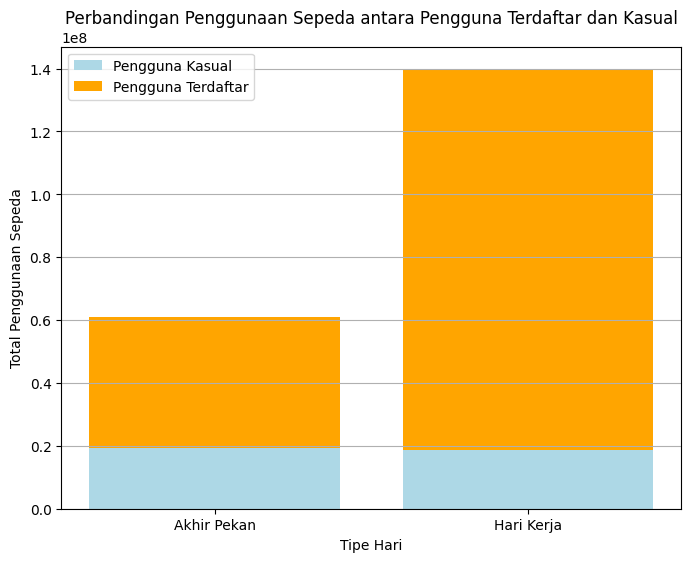

In [43]:
# Mengelompokkan data berdasarkan workingday dan menghitung total pengguna casual dan registered
usage_comparison = final_df.groupby('workingday_x').agg({
    'casual_x': 'sum',
    'registered_x': 'sum'
}).reset_index()

# Mengubah workingday menjadi label yang lebih informatif
usage_comparison['workingday_x'] = usage_comparison['workingday_x'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Visualisasi menggunakan stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(usage_comparison['workingday_x'], usage_comparison['casual_x'], label='Pengguna Kasual', color='lightblue')
plt.bar(usage_comparison['workingday_x'], usage_comparison['registered_x'], bottom=usage_comparison['casual_x'], label='Pengguna Terdaftar', color='orange')

plt.title('Perbandingan Penggunaan Sepeda antara Pengguna Terdaftar dan Kasual')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penggunaan Sepeda')
plt.legend()
plt.grid(axis='y')
plt.show()


### Pertanyaan 3: Apa pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada hari kerja dan akhir pekan?

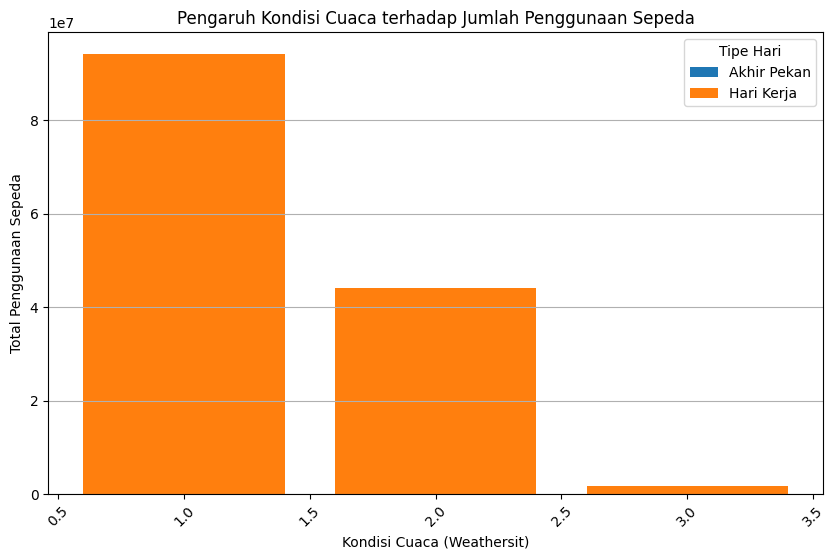

In [48]:
# Mengelompokkan data berdasarkan weathersit dan workingday
weather_usage = final_df.groupby(['weathersit_x', 'workingday_x']).agg({'cnt_x': 'sum'}).reset_index()

# Mengubah workingday menjadi label yang lebih informatif
weather_usage['workingday_x'] = weather_usage['workingday_x'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Visualisasi menggunakan bar chart
plt.figure(figsize=(10, 6))
for workingday in weather_usage['workingday_x'].unique():
    subset = weather_usage[weather_usage['workingday_x'] == workingday]
    plt.bar(subset['weathersit_x'], subset['cnt_x'], label=workingday)

plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (Weathersit)')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.legend(title='Tipe Hari')
plt.grid(axis='y')
plt.show()


### Pertanyaan 4: Seberapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual terhadap total penggunaan sepeda?

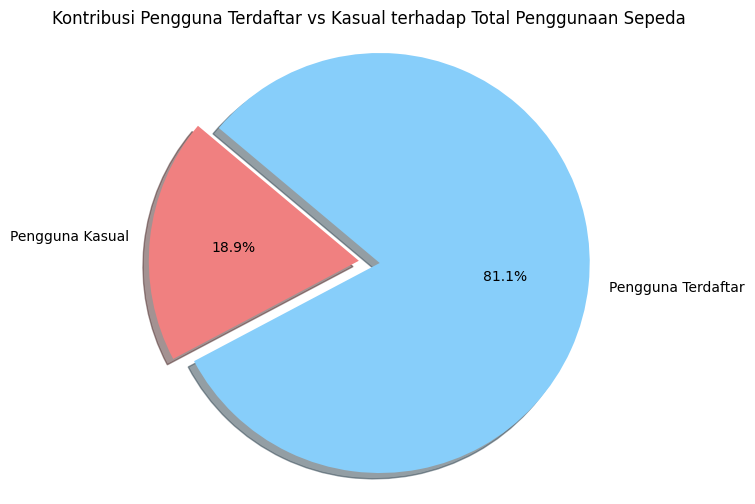

In [49]:
# Menghitung total penggunaan sepeda dari pengguna terdaftar dan kasual
total_usage = final_df[['casual_x', 'registered_x']].sum()

# Menampilkan kontribusi dalam bentuk pie chart
labels = ['Pengguna Kasual', 'Pengguna Terdaftar']
sizes = total_usage.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # hanya memisahkan segmen pertama

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Kontribusi Pengguna Terdaftar vs Kasual terhadap Total Penggunaan Sepeda')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


## Conclusion

- Conclution pertanyaan 1: Tren penggunaan sepeda disepanjang bulan selama satu tahun terakhir?





Tren penggunaan sepeda bervariasi sepanjang tahun, terlihat ada fluktuasi jumlah penggunaan sepeda dari bulan ke bulan. Hal ini dipengaruhi oleh kondisi cuaca. misalnya pada bulan april-juni kondisi cuaca yang lebih baik sehingga lebih banyak orang menggunakan sepeda untuk aktivitas luar ruangan. Sedangkan pada bulan desember atau januari, kondisi cuaca kurang mendukung sehingga terdapat penurunan penggunaan sepeda pada bulan tersebut.

- Conclution pertanyaan 2: Apakah terdapat perbedaan pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual pada hari kerja dibandingkan dengan akhir pekan?





 Pengguna kasual lebih sering menggunakan sepeda pada akhir pekan untuk rekreasi, sedangkan pengguna terdaftar lebih aktif pada hari kerja untuk aktivitas rutin seperti bekerja atau kuliah. Ini menunjukkan bahwa pengguna terdaftar memiliki pola penggunaan yang lebih stabil sepanjang minggu, sementara pengguna kasual lebih aktif pada akhir pekan. Strategi promosi dan pengembangan layanan bisa difokuskan pada pengguna kasual saat akhir pekan, misalnya melalui promosi khusus atau penambahan fasilitas pada hari-hari tersebut.
- conclusion pertanyaan 3: Apa pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada hari kerja dan akhir pekan?





Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penggunaan sepeda baik pada hari kerja maupun akhir pekan. Penggunaan sepeda lebih tinggi saat cuaca cerah atau berawan ringan, baik pada hari kerja maupun akhir pekan. Sebaliknya, saat cuaca memburuk, seperti ketika hujan, salju, atau kabut tebal, jumlah penggunaan sepeda menurun drastis. Hal ini menunjukkan bahwa cuaca yang baik lebih mendorong penggunaan sepeda untuk rekreasi pada akhir pekan, sedangkan pada hari kerja, pengguna lebih konsisten menggunakan sepeda meski ada perubahan kondisi cuaca.

- conclusion pertanyaan 4: Seberapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual terhadap total penggunaan sepeda?




Pengguna terdaftar memiliki kontribusi yang lebih besar terhadap total penggunaan sepeda dibandingkan pengguna kasual, menunjukkan bahwa pengguna terdaftar lebih konsisten dan rutin menggunakan sepeda, sedangkan pengguna kasual hanya menggunakan sepeda pada waktu-waktu tertentu
